## Product Classification for Inventory Management

### Importance of Inventory Management

If your business requires maintaining an inventory, you might sometimes feel like you're walking a tightrope. Not having enough inventory means you run the risk of losing sales, while having too much inventory is costly in more ways than one. That's why having an efficient inventory control system is so important.

A solution such as a powerful image classifier can help the company track shelf inventory, categorize products, record product volume etc.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Using fastai library built upon Pytorch
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
# Downloading Dataset
!wget https://he-s3.s3.amazonaws.com/media/hackathon/deep-learning-challenge-1/identify-the-objects/a0409a00-8-dataset_dp.zip

--2017-11-11 14:10:02--  https://he-s3.s3.amazonaws.com/media/hackathon/deep-learning-challenge-1/identify-the-objects/a0409a00-8-dataset_dp.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.32.120
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.32.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 534082470 (509M) [application/zip]
Saving to: ‘a0409a00-8-dataset_dp.zip’

a0409a00-8-dataset_ 100%[===================>] 509.34M  9.28MB/s    in 82s     

2017-11-11 14:11:25 (6.23 MB/s) - ‘a0409a00-8-dataset_dp.zip’ saved [534082470/534082470]



In [7]:
!unzip a0409a00-8-dataset_dp.zip

Archive:  a0409a00-8-dataset_dp.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
   creating: test_img/
  inflating: test_img/test_1000a.png  
  inflating: test_img/test_1000b.png  
  inflating: test_img/test_1000c.png  
  inflating: test_img/test_1000d.png  
  inflating: test_img/test_1001a.png  
  inflating: test_img/test_1001b.png  
  inflating: test_img/test_1001c.png  
  inflating: test_img/test_1001d.png  
  inflating: test_img/test_1002a.png  
  inflating: test_img/test_1002b.png  
  inflating: test_img/test_1002c.png  
  inflating: test_img/test_1002d.png  
  inflating: test_img/test_1003a.png  
  inflating: test_img/test_1003b.png  
  inflating: test_img/test_1003c.png  
  inflating: test_img/test_1003d.png  
  inflating: test_img/test_1004a.png  
  inflating: test_img/test_1004b.png  
  inflating: test_img/test_1004c.png  
  inflating: test_img/test_1004d.png  
  inflating: test_img/test_1005a.png  
  inflating: test_img/test_1005b.png  
  infla

  inflating: test_img/test_1052a.png  
  inflating: test_img/test_1052b.png  
  inflating: test_img/test_1052c.png  
  inflating: test_img/test_1052d.png  
  inflating: test_img/test_1053a.png  
  inflating: test_img/test_1053b.png  
  inflating: test_img/test_1053c.png  
  inflating: test_img/test_1053d.png  
  inflating: test_img/test_1054a.png  
  inflating: test_img/test_1054b.png  
  inflating: test_img/test_1054c.png  
  inflating: test_img/test_1054d.png  
  inflating: test_img/test_1055a.png  
  inflating: test_img/test_1055b.png  
  inflating: test_img/test_1055c.png  
  inflating: test_img/test_1055d.png  
  inflating: test_img/test_1056a.png  
  inflating: test_img/test_1056b.png  
  inflating: test_img/test_1056c.png  
  inflating: test_img/test_1056d.png  
  inflating: test_img/test_1057a.png  
  inflating: test_img/test_1057b.png  
  inflating: test_img/test_1057c.png  
  inflating: test_img/test_1057d.png  
  inflating: test_img/test_1058a.png  
  inflating: test_img/tes

  inflating: test_img/test_1106c.png  
  inflating: test_img/test_1106d.png  
  inflating: test_img/test_1107a.png  
  inflating: test_img/test_1107b.png  
  inflating: test_img/test_1107c.png  
  inflating: test_img/test_1107d.png  
  inflating: test_img/test_1108a.png  
  inflating: test_img/test_1108b.png  
  inflating: test_img/test_1108c.png  
  inflating: test_img/test_1108d.png  
  inflating: test_img/test_1109a.png  
  inflating: test_img/test_1109b.png  
  inflating: test_img/test_1109c.png  
  inflating: test_img/test_1109d.png  
  inflating: test_img/test_1110a.png  
  inflating: test_img/test_1110b.png  
  inflating: test_img/test_1110c.png  
  inflating: test_img/test_1110d.png  
  inflating: test_img/test_1111a.png  
  inflating: test_img/test_1111b.png  
  inflating: test_img/test_1111c.png  
  inflating: test_img/test_1111d.png  
  inflating: test_img/test_1112a.png  
  inflating: test_img/test_1112b.png  
  inflating: test_img/test_1112c.png  
  inflating: test_img/tes

  inflating: test_img/test_1161a.png  
  inflating: test_img/test_1161b.png  
  inflating: test_img/test_1161c.png  
  inflating: test_img/test_1161d.png  
  inflating: test_img/test_1162a.png  
  inflating: test_img/test_1162b.png  
  inflating: test_img/test_1162c.png  
  inflating: test_img/test_1162d.png  
  inflating: test_img/test_1163a.png  
  inflating: test_img/test_1163b.png  
  inflating: test_img/test_1163c.png  
  inflating: test_img/test_1163d.png  
  inflating: test_img/test_1164a.png  
  inflating: test_img/test_1164b.png  
  inflating: test_img/test_1164c.png  
  inflating: test_img/test_1164d.png  
  inflating: test_img/test_1165a.png  
  inflating: test_img/test_1165b.png  
  inflating: test_img/test_1165c.png  
  inflating: test_img/test_1165d.png  
  inflating: test_img/test_1166a.png  
  inflating: test_img/test_1166b.png  
  inflating: test_img/test_1166c.png  
  inflating: test_img/test_1166d.png  
  inflating: test_img/test_1167a.png  
  inflating: test_img/tes

  inflating: test_img/test_1215c.png  
  inflating: test_img/test_1215d.png  
  inflating: test_img/test_1216a.png  
  inflating: test_img/test_1216b.png  
  inflating: test_img/test_1216c.png  
  inflating: test_img/test_1216d.png  
  inflating: test_img/test_1217a.png  
  inflating: test_img/test_1217b.png  
  inflating: test_img/test_1217c.png  
  inflating: test_img/test_1217d.png  
  inflating: test_img/test_1218a.png  
  inflating: test_img/test_1218b.png  
  inflating: test_img/test_1218c.png  
  inflating: test_img/test_1218d.png  
  inflating: test_img/test_1219a.png  
  inflating: test_img/test_1219b.png  
  inflating: test_img/test_1219c.png  
  inflating: test_img/test_1219d.png  
  inflating: test_img/test_1220a.png  
  inflating: test_img/test_1220b.png  
  inflating: test_img/test_1220c.png  
  inflating: test_img/test_1220d.png  
  inflating: test_img/test_1221a.png  
  inflating: test_img/test_1221b.png  
  inflating: test_img/test_1221c.png  
  inflating: test_img/tes

  inflating: test_img/test_1277a.png  
  inflating: test_img/test_1277b.png  
  inflating: test_img/test_1277c.png  
  inflating: test_img/test_1277d.png  
  inflating: test_img/test_1278a.png  
  inflating: test_img/test_1278b.png  
  inflating: test_img/test_1278c.png  
  inflating: test_img/test_1278d.png  
  inflating: test_img/test_1279a.png  
  inflating: test_img/test_1279b.png  
  inflating: test_img/test_1279c.png  
  inflating: test_img/test_1279d.png  
  inflating: test_img/test_1280a.png  
  inflating: test_img/test_1280b.png  
  inflating: test_img/test_1280c.png  
  inflating: test_img/test_1280d.png  
  inflating: test_img/test_1281a.png  
  inflating: test_img/test_1281b.png  
  inflating: test_img/test_1281c.png  
  inflating: test_img/test_1281d.png  
  inflating: test_img/test_1282a.png  
  inflating: test_img/test_1282b.png  
  inflating: test_img/test_1282c.png  
  inflating: test_img/test_1282d.png  
  inflating: test_img/test_1283a.png  
  inflating: test_img/tes

  inflating: test_img/test_1332a.png  
  inflating: test_img/test_1332b.png  
  inflating: test_img/test_1332c.png  
  inflating: test_img/test_1332d.png  
  inflating: test_img/test_1333a.png  
  inflating: test_img/test_1333b.png  
  inflating: test_img/test_1333c.png  
  inflating: test_img/test_1333d.png  
  inflating: test_img/test_1334a.png  
  inflating: test_img/test_1334b.png  
  inflating: test_img/test_1334c.png  
  inflating: test_img/test_1334d.png  
  inflating: test_img/test_1335a.png  
  inflating: test_img/test_1335b.png  
  inflating: test_img/test_1335c.png  
  inflating: test_img/test_1335d.png  
  inflating: test_img/test_1336a.png  
  inflating: test_img/test_1336b.png  
  inflating: test_img/test_1336c.png  
  inflating: test_img/test_1336d.png  
  inflating: test_img/test_1337a.png  
  inflating: test_img/test_1337b.png  
  inflating: test_img/test_1337c.png  
  inflating: test_img/test_1337d.png  
  inflating: test_img/test_1338a.png  
  inflating: test_img/tes

  inflating: test_img/test_1390b.png  
  inflating: test_img/test_1390c.png  
  inflating: test_img/test_1390d.png  
  inflating: test_img/test_1391a.png  
  inflating: test_img/test_1391b.png  
  inflating: test_img/test_1391c.png  
  inflating: test_img/test_1391d.png  
  inflating: test_img/test_1392a.png  
  inflating: test_img/test_1392b.png  
  inflating: test_img/test_1392c.png  
  inflating: test_img/test_1392d.png  
  inflating: test_img/test_1393a.png  
  inflating: test_img/test_1393b.png  
  inflating: test_img/test_1393c.png  
  inflating: test_img/test_1393d.png  
  inflating: test_img/test_1394a.png  
  inflating: test_img/test_1394b.png  
  inflating: test_img/test_1394c.png  
  inflating: test_img/test_1394d.png  
  inflating: test_img/test_1395a.png  
  inflating: test_img/test_1395b.png  
  inflating: test_img/test_1395c.png  
  inflating: test_img/test_1395d.png  
  inflating: test_img/test_1396a.png  
  inflating: test_img/test_1396b.png  
  inflating: test_img/tes

  inflating: train_img/train_116c.png  
  inflating: train_img/train_116d.png  
  inflating: train_img/train_117a.png  
  inflating: train_img/train_117b.png  
  inflating: train_img/train_117c.png  
  inflating: train_img/train_117d.png  
  inflating: train_img/train_118a.png  
  inflating: train_img/train_118b.png  
  inflating: train_img/train_118c.png  
  inflating: train_img/train_118d.png  
  inflating: train_img/train_119a.png  
  inflating: train_img/train_119b.png  
  inflating: train_img/train_119c.png  
  inflating: train_img/train_119d.png  
  inflating: train_img/train_11a.png  
  inflating: train_img/train_11b.png  
  inflating: train_img/train_11c.png  
  inflating: train_img/train_11d.png  
  inflating: train_img/train_120a.png  
  inflating: train_img/train_120b.png  
  inflating: train_img/train_120c.png  
  inflating: train_img/train_120d.png  
  inflating: train_img/train_121a.png  
  inflating: train_img/train_121b.png  
  inflating: train_img/train_121c.png  
  in

  inflating: train_img/train_166c.png  
  inflating: train_img/train_166d.png  
  inflating: train_img/train_167a.png  
  inflating: train_img/train_167b.png  
  inflating: train_img/train_167c.png  
  inflating: train_img/train_167d.png  
  inflating: train_img/train_168a.png  
  inflating: train_img/train_168b.png  
  inflating: train_img/train_168c.png  
  inflating: train_img/train_168d.png  
  inflating: train_img/train_169a.png  
  inflating: train_img/train_169b.png  
  inflating: train_img/train_169c.png  
  inflating: train_img/train_169d.png  
  inflating: train_img/train_16a.png  
  inflating: train_img/train_16b.png  
  inflating: train_img/train_16c.png  
  inflating: train_img/train_16d.png  
  inflating: train_img/train_170a.png  
  inflating: train_img/train_170b.png  
  inflating: train_img/train_170c.png  
  inflating: train_img/train_170d.png  
  inflating: train_img/train_171a.png  
  inflating: train_img/train_171b.png  
  inflating: train_img/train_171c.png  
  in

  inflating: train_img/train_213d.png  
  inflating: train_img/train_214a.png  
  inflating: train_img/train_214b.png  
  inflating: train_img/train_214c.png  
  inflating: train_img/train_214d.png  
  inflating: train_img/train_215a.png  
  inflating: train_img/train_215b.png  
  inflating: train_img/train_215c.png  
  inflating: train_img/train_215d.png  
  inflating: train_img/train_216a.png  
  inflating: train_img/train_216b.png  
  inflating: train_img/train_216c.png  
  inflating: train_img/train_216d.png  
  inflating: train_img/train_217a.png  
  inflating: train_img/train_217b.png  
  inflating: train_img/train_217c.png  
  inflating: train_img/train_217d.png  
  inflating: train_img/train_218a.png  
  inflating: train_img/train_218b.png  
  inflating: train_img/train_218c.png  
  inflating: train_img/train_218d.png  
  inflating: train_img/train_219a.png  
  inflating: train_img/train_219b.png  
  inflating: train_img/train_219c.png  
  inflating: train_img/train_219d.png  


  inflating: train_img/train_26b.png  
  inflating: train_img/train_26c.png  
  inflating: train_img/train_26d.png  
  inflating: train_img/train_270a.png  
  inflating: train_img/train_270b.png  
  inflating: train_img/train_270c.png  
  inflating: train_img/train_270d.png  
  inflating: train_img/train_271a.png  
  inflating: train_img/train_271b.png  
  inflating: train_img/train_271c.png  
  inflating: train_img/train_271d.png  
  inflating: train_img/train_272a.png  
  inflating: train_img/train_272b.png  
  inflating: train_img/train_272c.png  
  inflating: train_img/train_272d.png  
  inflating: train_img/train_273a.png  
  inflating: train_img/train_273b.png  
  inflating: train_img/train_273c.png  
  inflating: train_img/train_273d.png  
  inflating: train_img/train_274a.png  
  inflating: train_img/train_274b.png  
  inflating: train_img/train_274c.png  
  inflating: train_img/train_274d.png  
  inflating: train_img/train_275a.png  
  inflating: train_img/train_275b.png  
  i

  inflating: train_img/train_31a.png  
  inflating: train_img/train_31b.png  
  inflating: train_img/train_31c.png  
  inflating: train_img/train_31d.png  
  inflating: train_img/train_320a.png  
  inflating: train_img/train_320b.png  
  inflating: train_img/train_320c.png  
  inflating: train_img/train_320d.png  
  inflating: train_img/train_321a.png  
  inflating: train_img/train_321b.png  
  inflating: train_img/train_321c.png  
  inflating: train_img/train_321d.png  
  inflating: train_img/train_322a.png  
  inflating: train_img/train_322b.png  
  inflating: train_img/train_322c.png  
  inflating: train_img/train_322d.png  
  inflating: train_img/train_323a.png  
  inflating: train_img/train_323b.png  
  inflating: train_img/train_323c.png  
  inflating: train_img/train_323d.png  
  inflating: train_img/train_324a.png  
  inflating: train_img/train_324b.png  
  inflating: train_img/train_324c.png  
  inflating: train_img/train_324d.png  
  inflating: train_img/train_325a.png  
  in

  inflating: train_img/train_372d.png  
  inflating: train_img/train_373a.png  
  inflating: train_img/train_373b.png  
  inflating: train_img/train_373c.png  
  inflating: train_img/train_373d.png  
  inflating: train_img/train_374a.png  
  inflating: train_img/train_374b.png  
  inflating: train_img/train_374c.png  
  inflating: train_img/train_374d.png  
  inflating: train_img/train_375a.png  
  inflating: train_img/train_375b.png  
  inflating: train_img/train_375c.png  
  inflating: train_img/train_375d.png  
  inflating: train_img/train_376a.png  
  inflating: train_img/train_376b.png  
  inflating: train_img/train_376c.png  
  inflating: train_img/train_376d.png  
  inflating: train_img/train_377a.png  
  inflating: train_img/train_377b.png  
  inflating: train_img/train_377c.png  
  inflating: train_img/train_377d.png  
  inflating: train_img/train_378a.png  
  inflating: train_img/train_378b.png  
  inflating: train_img/train_378c.png  
  inflating: train_img/train_378d.png  


  inflating: train_img/train_419b.png  
  inflating: train_img/train_419c.png  
  inflating: train_img/train_419d.png  
  inflating: train_img/train_41a.png  
  inflating: train_img/train_41b.png  
  inflating: train_img/train_41c.png  
  inflating: train_img/train_41d.png  
  inflating: train_img/train_420a.png  
  inflating: train_img/train_420b.png  
  inflating: train_img/train_420c.png  
  inflating: train_img/train_420d.png  
  inflating: train_img/train_421a.png  
  inflating: train_img/train_421b.png  
  inflating: train_img/train_421c.png  
  inflating: train_img/train_421d.png  
  inflating: train_img/train_422a.png  
  inflating: train_img/train_422b.png  
  inflating: train_img/train_422c.png  
  inflating: train_img/train_422d.png  
  inflating: train_img/train_423a.png  
  inflating: train_img/train_423b.png  
  inflating: train_img/train_423c.png  
  inflating: train_img/train_423d.png  
  inflating: train_img/train_424a.png  
  inflating: train_img/train_424b.png  
  in

  inflating: train_img/train_474a.png  
  inflating: train_img/train_474b.png  
  inflating: train_img/train_474c.png  
  inflating: train_img/train_474d.png  
  inflating: train_img/train_475a.png  
  inflating: train_img/train_475b.png  
  inflating: train_img/train_475c.png  
  inflating: train_img/train_475d.png  
  inflating: train_img/train_476a.png  
  inflating: train_img/train_476b.png  
  inflating: train_img/train_476c.png  
  inflating: train_img/train_476d.png  
  inflating: train_img/train_477a.png  
  inflating: train_img/train_477b.png  
  inflating: train_img/train_477c.png  
  inflating: train_img/train_477d.png  
  inflating: train_img/train_478a.png  
  inflating: train_img/train_478b.png  
  inflating: train_img/train_478c.png  
  inflating: train_img/train_478d.png  
  inflating: train_img/train_479a.png  
  inflating: train_img/train_479b.png  
  inflating: train_img/train_479c.png  
  inflating: train_img/train_479d.png  
  inflating: train_img/train_47a.png  
 

  inflating: train_img/train_525a.png  
  inflating: train_img/train_525b.png  
  inflating: train_img/train_525c.png  
  inflating: train_img/train_525d.png  
  inflating: train_img/train_526a.png  
  inflating: train_img/train_526b.png  
  inflating: train_img/train_526c.png  
  inflating: train_img/train_526d.png  
  inflating: train_img/train_527a.png  
  inflating: train_img/train_527b.png  
  inflating: train_img/train_527c.png  
  inflating: train_img/train_527d.png  
  inflating: train_img/train_528a.png  
  inflating: train_img/train_528b.png  
  inflating: train_img/train_528c.png  
  inflating: train_img/train_528d.png  
  inflating: train_img/train_529a.png  
  inflating: train_img/train_529b.png  
  inflating: train_img/train_529c.png  
  inflating: train_img/train_529d.png  
  inflating: train_img/train_52a.png  
  inflating: train_img/train_52b.png  
  inflating: train_img/train_52c.png  
  inflating: train_img/train_52d.png  
  inflating: train_img/train_530a.png  
  in

  inflating: train_img/train_571d.png  
  inflating: train_img/train_572a.png  
  inflating: train_img/train_572b.png  
  inflating: train_img/train_572c.png  
  inflating: train_img/train_572d.png  
  inflating: train_img/train_573a.png  
  inflating: train_img/train_573b.png  
  inflating: train_img/train_573c.png  
  inflating: train_img/train_573d.png  
  inflating: train_img/train_574a.png  
  inflating: train_img/train_574b.png  
  inflating: train_img/train_574c.png  
  inflating: train_img/train_574d.png  
  inflating: train_img/train_575a.png  
  inflating: train_img/train_575b.png  
  inflating: train_img/train_575c.png  
  inflating: train_img/train_575d.png  
  inflating: train_img/train_576a.png  
  inflating: train_img/train_576b.png  
  inflating: train_img/train_576c.png  
  inflating: train_img/train_576d.png  
  inflating: train_img/train_577a.png  
  inflating: train_img/train_577b.png  
  inflating: train_img/train_577c.png  
  inflating: train_img/train_577d.png  


  inflating: train_img/train_620a.png  
  inflating: train_img/train_620b.png  
  inflating: train_img/train_620c.png  
  inflating: train_img/train_620d.png  
  inflating: train_img/train_621a.png  
  inflating: train_img/train_621b.png  
  inflating: train_img/train_621c.png  
  inflating: train_img/train_621d.png  
  inflating: train_img/train_622a.png  
  inflating: train_img/train_622b.png  
  inflating: train_img/train_622c.png  
  inflating: train_img/train_622d.png  
  inflating: train_img/train_623a.png  
  inflating: train_img/train_623b.png  
  inflating: train_img/train_623c.png  
  inflating: train_img/train_623d.png  
  inflating: train_img/train_624a.png  
  inflating: train_img/train_624b.png  
  inflating: train_img/train_624c.png  
  inflating: train_img/train_624d.png  
  inflating: train_img/train_625a.png  
  inflating: train_img/train_625b.png  
  inflating: train_img/train_625c.png  
  inflating: train_img/train_625d.png  
  inflating: train_img/train_626a.png  


  inflating: train_img/train_673c.png  
  inflating: train_img/train_673d.png  
  inflating: train_img/train_674a.png  
  inflating: train_img/train_674b.png  
  inflating: train_img/train_674c.png  
  inflating: train_img/train_674d.png  
  inflating: train_img/train_675a.png  
  inflating: train_img/train_675b.png  
  inflating: train_img/train_675c.png  
  inflating: train_img/train_675d.png  
  inflating: train_img/train_676a.png  
  inflating: train_img/train_676b.png  
  inflating: train_img/train_676c.png  
  inflating: train_img/train_676d.png  
  inflating: train_img/train_677a.png  
  inflating: train_img/train_677b.png  
  inflating: train_img/train_677c.png  
  inflating: train_img/train_677d.png  
  inflating: train_img/train_678a.png  
  inflating: train_img/train_678b.png  
  inflating: train_img/train_678c.png  
  inflating: train_img/train_678d.png  
  inflating: train_img/train_679a.png  
  inflating: train_img/train_679b.png  
  inflating: train_img/train_679c.png  


  inflating: train_img/train_726b.png  
  inflating: train_img/train_726c.png  
  inflating: train_img/train_726d.png  
  inflating: train_img/train_727a.png  
  inflating: train_img/train_727b.png  
  inflating: train_img/train_727c.png  
  inflating: train_img/train_727d.png  
  inflating: train_img/train_728a.png  
  inflating: train_img/train_728b.png  
  inflating: train_img/train_728c.png  
  inflating: train_img/train_728d.png  
  inflating: train_img/train_729a.png  
  inflating: train_img/train_729b.png  
  inflating: train_img/train_729c.png  
  inflating: train_img/train_729d.png  
  inflating: train_img/train_72a.png  
  inflating: train_img/train_72b.png  
  inflating: train_img/train_72c.png  
  inflating: train_img/train_72d.png  
  inflating: train_img/train_730a.png  
  inflating: train_img/train_730b.png  
  inflating: train_img/train_730c.png  
  inflating: train_img/train_730d.png  
  inflating: train_img/train_731a.png  
  inflating: train_img/train_731b.png  
  in

  inflating: train_img/train_77d.png  
  inflating: train_img/train_780a.png  
  inflating: train_img/train_780b.png  
  inflating: train_img/train_780c.png  
  inflating: train_img/train_780d.png  
  inflating: train_img/train_781a.png  
  inflating: train_img/train_781b.png  
  inflating: train_img/train_781c.png  
  inflating: train_img/train_781d.png  
  inflating: train_img/train_782a.png  
  inflating: train_img/train_782b.png  
  inflating: train_img/train_782c.png  
  inflating: train_img/train_782d.png  
  inflating: train_img/train_783a.png  
  inflating: train_img/train_783b.png  
  inflating: train_img/train_783c.png  
  inflating: train_img/train_783d.png  
  inflating: train_img/train_784a.png  
  inflating: train_img/train_784b.png  
  inflating: train_img/train_784c.png  
  inflating: train_img/train_784d.png  
  inflating: train_img/train_785a.png  
  inflating: train_img/train_785b.png  
  inflating: train_img/train_785c.png  
  inflating: train_img/train_785d.png  
 

In [8]:
!ls

a0409a00-8-dataset_dp.zip	 lesson2-image_models.ipynb
Classifying food products.ipynb  nlp-arxiv.ipynb
data				 nlp.ipynb
dogscats			 planet_cv.ipynb
excel				 planet.py
fastai				 rossman_exp.py
fish.ipynb			 rossman.ipynb
images				 sample_submission.csv
lang_model-arxiv.ipynb		 scripts
lang_model-imdb.ipynb		 test.csv
lang_model.ipynb		 test_img
lesson1.ipynb			 test_transforms.ipynb
lesson1-rxt50.ipynb		 train.csv
lesson1-sgd.ipynb		 train_img
lesson1-vgg.ipynb


In [5]:
PATH1 = "food_data"

In [6]:
# Dimensions of the image that will be used
sz=224

In [10]:
# Rearranging files

os.makedirs('food_data', exist_ok=True)
!mv train_img food_data
!mv test_img food_data
!mv train.csv food_data
!mv test.csv food_data
!mv sample_submission.csv food_data
!rm a0409a00-8-dataset_dp.zip

### Looking at some Pictures

In [18]:
!ls {PATH1}

sample_submission.csv  test.csv  test_img  train.csv  train_img


In [19]:
files = !ls {PATH1}/train_img | head
files

['train_100a.png',
 'train_100b.png',
 'train_100c.png',
 'train_100d.png',
 'train_101a.png',
 'train_101b.png',
 'train_101c.png',
 'train_101d.png',
 'train_102a.png',
 'train_102b.png']

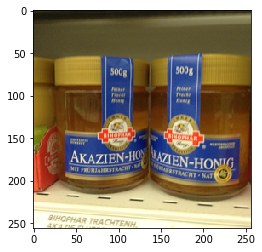

In [20]:
img = plt.imread(f'{PATH1}/train_img/{files[0]}')
plt.imshow(img);

Here is how the raw data looks like

In [21]:
img.shape

(256, 256, 3)

In [22]:
img[:4,:4]

array([[[ 0.21569,  0.19608,  0.08627],
        [ 0.2    ,  0.18431,  0.07843],
        [ 0.21176,  0.19216,  0.09412],
        [ 0.20784,  0.18824,  0.08627]],

       [[ 0.21176,  0.18431,  0.09412],
        [ 0.19608,  0.17647,  0.0902 ],
        [ 0.2    ,  0.18039,  0.09804],
        [ 0.2    ,  0.18039,  0.09412]],

       [[ 0.18039,  0.15686,  0.08235],
        [ 0.17647,  0.15294,  0.08235],
        [ 0.17255,  0.14902,  0.08627],
        [ 0.17647,  0.14902,  0.08627]],

       [[ 0.13333,  0.1098 ,  0.05098],
        [ 0.14118,  0.11765,  0.06667],
        [ 0.12549,  0.10196,  0.05098],
        [ 0.12941,  0.10588,  0.0549 ]]], dtype=float32)

## Data Preparation

In [23]:
import shutil
import os

In [2]:
traincsv = pd.read_csv('food_data/train.csv')

NameError: name 'pd' is not defined

In [25]:
testcsv = pd.read_csv('food_data/test.csv')

In [26]:
for i in list(traincsv['label'].unique()):
    os.makedirs('food_data/train/' + i)

In [27]:
for i in list(traincsv['label'].unique()):
    os.makedirs('food_data/valid/' + i)

In [29]:
traincsv['label'].unique()

array(['rice', 'candy', 'jam', 'coffee', 'vinegar', 'chocolate', 'sugar', 'water', 'juice', 'milk', 'soda',
       'nuts', 'chips', 'spices', 'cereal', 'beans', 'cake', 'honey', 'flour', 'pasta', 'tomatosauce', 'tea',
       'corn', 'oil', 'fish'], dtype=object)

In [30]:
len(traincsv['label'].unique())

25

In [31]:
len(traincsv['image_id'])

3215

In [32]:
type(traincsv['image_id'])

pandas.core.series.Series

In [33]:
traincsv['image_id'].values

array(['train_1a', 'train_1b', 'train_1c', ..., 'train_804a', 'train_804b', 'train_804c'], dtype=object)

In [34]:
traincsv['label'][1]

'candy'

In [35]:
for i, pos in zip(list(traincsv['image_id'].values), list(traincsv['image_id'].index)):
    label = traincsv['label'][pos]
    src_path = os.path.join('food_data/train_img', i + '.png')
    dest_path = os.path.join('food_data/train', label)
    shutil.move(src_path, dest_path)

In [39]:
#Dividing into Training (70%) and Validation (30%)

num_of_valid = int(0.3*len(traincsv))
traindata = list(traincsv['image_id'].values)
for i in range(num_of_valid):
    label = traincsv['label'][i]
    src_path = os.path.join('food_data/train', label + '/' + traindata[i] + '.png')
    dest_path = 'food_data/valid/' + label
    shutil.move(src_path, dest_path)

In [40]:
mv food_data/test_img food_data/test

### Let's see the distribution

In [1]:
label_counts = traincsv.label.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Labels', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

NameError: name 'traincsv' is not defined

## Our first model - Pretrained with resnet34 arch

We're going to use a <b>pre-trained</b> model, that is, a model created by some one else to solve a different problem. Instead of building a model from scratch to solve a similar problem, we'll use a model trained on ImageNet (1.2 million images and 1000 classes) as a starting point. The model is a Convolutional Neural Network (CNN), a type of Neural Network that builds state-of-the-art models for computer vision.

We will be using the <b>resnet34</b> model. resnet34 is a version of the model that won the 2015 ImageNet competition. Here is more info on [resnet models](https://github.com/KaimingHe/deep-residual-networks).


In [ ]:
learning_rate = 0.01
epochs = 10
arch=resnet34
data = ImageClassifierData.from_paths(PATH1, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(learning_rate, epochs)

  0%|          | 0/36 [00:00<?, ?it/s]

Epoch | Training Loss | Validation Loss | Accuracy

## Choosing a learning rate

The *learning rate* determines how quickly or how slowly you want to update the *weights* (or *parameters*). Learning rate is one of the most difficult parameters to set, because it significantly affect model performance.

**Cyclic Learning Rates**: Simply keep increasing the learning rate from a very small value, until the loss starts decreasing. We can plot the learning rate across batches to see what this looks like.

We first create a new learner, since we want to know how to set the learning rate for a new (untrained) model.

In [49]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [50]:
lrf=learn.lr_find()

A Jupyter Widget

 82%|████████▏ | 295/360 [00:02<00:00, 167.14it/s, loss=0.128] 


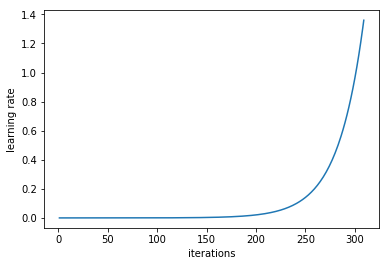

In [51]:
learn.sched.plot_lr()

For each minibatch, increase the learning rate.
Eventually the LR will be so high that lost will start getting worst.


Note that in the previous plot *iteration* is one iteration (or *minibatch*) of SGD. In one epoch there are 
(num_train_samples/num_iterations) of SGD.

We can see the plot of loss versus learning rate to see where our loss stops decreasing:

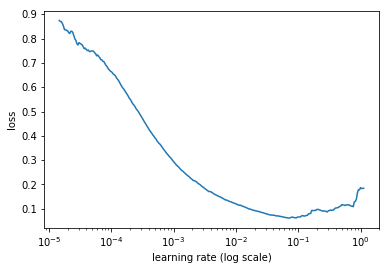

In [52]:
learn.sched.plot()

Point is not the find the minimum loss but to figure out what learning rate is allowing us to decrease step rate.

The loss is still clearly improving at lr=1e-2 (0.01), so that's what we use. Note that the optimal learning rate can change as we training the model, so you may want to re-run this function from time to time.

Point at the lowest has too high learning rate and will perform bad when used with restarts

No conflict between Lr and Adam:
Library figures right GD version. Tells the best learning rate to use besides ADAM.

## Improving our model

One of the common approach to improve performance is to increase the data.

### Data augmentation

If you try training for more epochs, you'll notice that we start to *overfit*, which means that our model is learning to recognize the specific images in the training set, rather than generalizaing such that we also get good results on the validation set. One way to fix this is to effectively create more data, through *data augmentation*. This refers to randomly changing the images in ways that shouldn't impact their interpretation, such as horizontal flipping, zooming, and rotating.

We can do this by passing `aug_tfms` (*augmentation transforms*) to `tfms_from_model`, with a list of functions to apply that randomly change the image however we wish. For photos that are largely taken from the side (e.g. most photos of dogs and cats, as opposed to photos taken from the top down, such as satellite imagery) we can use the pre-defined list of functions `transforms_side_on`. We can also specify random zooming of images up to specified scale by adding the `max_zoom` parameter.

In [ ]:
#Image resizing, cropping, normalization

?tfms_from_model

In [53]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [26]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH1, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [30]:
ims = np.stack([get_augs() for i in range(6)])

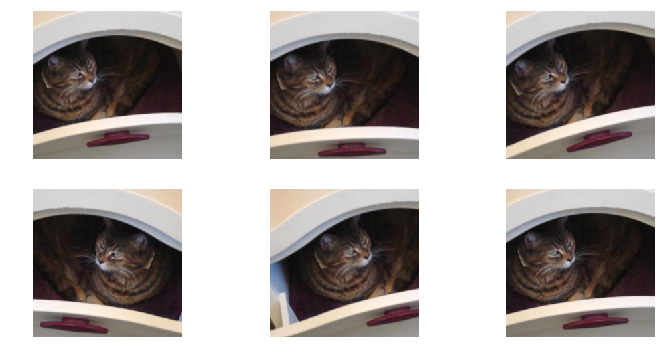

In [31]:
plots(ims, rows=2)

The type of image data tells what augmentation technique we can use

In [3]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

NameError: name 'ImageClassifierData' is not defined

In [ ]:
learning_rate = 0.01
epochs = 10

In [55]:
learn.fit(earning_rate, 10)

A Jupyter Widget

[ 0.       0.03651  0.01723  0.99365]                          



In [56]:
learn.precompute=False

By default when we create a learner, it sets all but the last layer to *frozen*. That means that it's still only updating the weights in the last layer when we call `fit`.

In [57]:
learn.fit(1e-2, 3, cycle_len=1)

A Jupyter Widget

[ 0.       0.03597  0.01879  0.99365]                         
[ 1.       0.02605  0.01836  0.99365]                         
[ 2.       0.02189  0.0196   0.99316]                         



What is that `cycle_len` parameter? What we've done here is used a technique called *stochastic gradient descent with restarts (SGDR)*, a variant of *learning rate annealing*, which gradually decreases the learning rate as training progresses. This is helpful because as we get closer to the optimal weights, we want to take smaller steps.

Idea of decreasing learning rate durin subsequent iterations is called annealing
The number of epochs between resetting the learning rate is set by `cycle_len`, and the number of times this happens is refered to as the *number of cycles*, and is what we're actually passing as the 2nd parameter to `fit()`. So here's what our actual learning rates looked like:

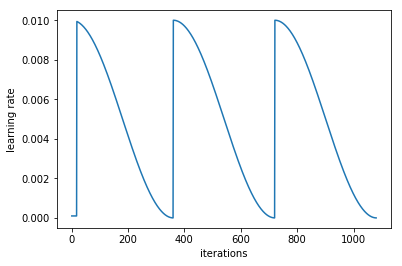

In [37]:
learn.sched.plot_lr()

In [31]:
learn.save('224_lastlayer')

In [ ]:
learn.load('224_lastlayer')

### Fine-tuning and differential learning rate annealing

In [32]:
learn.unfreeze()

Note that the other layers have *already* been trained to recognize imagenet photos (whereas our final layers where randomly initialized), so we want to be careful of not destroying the carefully tuned weights that are already there.

Generally speaking, the earlier layers (as we've seen) have more general-purpose features. Therefore we would expect them to need less fine-tuning for new datasets. For this reason we will use different learning rates for different layers: the first few layers will be at 1e-4, the middle layers at 1e-3, and our FC layers we'll leave at 1e-2 as before.

In [33]:
lr=np.array([1e-4,1e-3,1e-2])

In [34]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.04538  0.01965  0.99268]                         
[ 1.       0.03385  0.01807  0.99268]                         
[ 2.       0.03194  0.01714  0.99316]                         
[ 3.       0.0358   0.0166   0.99463]                         
[ 4.       0.02157  0.01504  0.99463]                         
[ 5.       0.0196   0.0151   0.99512]                         
[ 6.       0.01356  0.01518  0.9956 ]                         



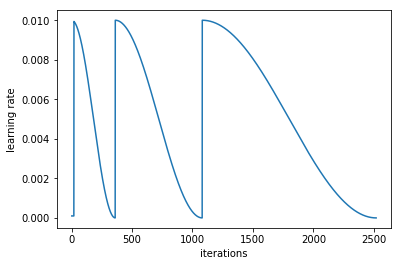

In [23]:
learn.sched.plot_lr()

In [35]:
learn.save('224_all')

In [9]:
learn.load('224_all')

TTA: simply makes predictions not just on the images in your validation set, but also makes predictions on a number of randomly augmented versions of them too (by default, it uses the original image along with 4 randomly augmented versions). It then takes the average prediction from these images, and uses that. To use TTA on the validation set, we can use the learner's `TTA()` method.

In [36]:
log_preds,y = learn.TTA()
accuracy(log_preds,y)

0.99650000000000005

I generally see about a 10-20% reduction in error on this dataset when using TTA at this point, which is an amazing result for such a quick and easy technique!

## Analyzing results

### Confusion matrix 

In [37]:
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds[:,1])

A common way to analyze the result of a classification model is to use a [confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). Scikit-learn has a convenient function we can use for this purpose:

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

We can just print out the confusion matrix, or we can show a graphical view (which is mainly useful for dependents with a larger number of categories).

[[998   2]
 [  5 995]]


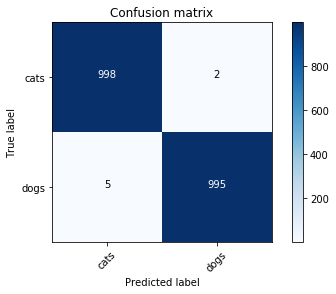

In [39]:
plot_confusion_matrix(cm, data.classes)

## Review: What we exactly did

1. Enable data augmentation, and precompute=True
1. Use `lr_find()` to find highest learning rate where loss is still clearly improving
1. Train last layer from precomputed activations for 1-2 epochs
1. Train last layer with data augmentation (i.e. precompute=False) for 2-3 epochs with cycle_len=1
1. Unfreeze all layers
1. Set earlier layers to 3x-10x lower learning rate than next higher layer
1. Use `lr_find()` again
1. Train full network with cycle_mult=2 until over-fitting

## Understanding the code for our first model

Let's look at the Dogs v Cats code line by line.

**tfms** stands for *transformations*. `tfms_from_model` takes care of resizing, image cropping, initial normalization (creating data with (mean,stdev) of (0,1)), and more.

In [29]:
tfms = tfms_from_model(resnet34, sz)

We need a <b>path</b> that points to the dataset. In this path we will also store temporary data and final results. `ImageClassifierData.from_paths` reads data from a provided path and creates a dataset ready for training.

In [30]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)

`ConvLearner.pretrained` builds *learner* that contains a pre-trained model. The last layer of the model needs to be replaced with the layer of the right dimensions. The pretained model was trained for 1000 classes therfore the final layer predicts a vector of 1000 probabilities. The model for cats and dogs needs to output a two dimensional vector. The diagram below shows in an example how this was done in one of the earliest successful CNNs. The layer "FC8" here would get replaced with a new layer with 2 outputs.

<img src="images/pretrained.png" width="500">
[original image](https://image.slidesharecdn.com/practicaldeeplearning-160329181459/95/practical-deep-learning-16-638.jpg)

In [31]:
learn = ConvLearner.pretrained(resnet34, data, precompute=True)

*Parameters*  are learned by fitting a model to the data. *Hyparameters* are another kind of parameter, that cannot be directly learned from the regular training process. These parameters express “higher-level” properties of the model such as its complexity or how fast it should learn. Two examples of hyperparameters are the *learning rate* and the *number of epochs*.

During iterative training of a neural network, a *batch* or *mini-batch* is a subset of training samples used in one iteration of Stochastic Gradient Descent (SGD). An *epoch* is a single pass through the entire training set which consists of multiple iterations of SGD.

We can now *fit* the model; that is, use *gradient descent* to find the best parameters for the fully connected layer we added, that can separate cat pictures from dog pictures. We need to pass two hyperameters: the *learning rate* (generally 1e-2 or 1e-3 is a good starting point, we'll look more at this next) and the *number of epochs* (you can pass in a higher number and just stop training when you see it's no longer improving, then re-run it with the number of epochs you found works well.)

In [32]:
learn.fit(1e-2, 1)

A Jupyter Widget

[ 0.       0.04153  0.02681  0.98877]                          



## Analyzing results: loss and accuracy

When we run `learn.fit` we print 3 performance values (see above.) Here 0.03 is the value of the **loss** in the training set, 0.0226 is the value of the loss in the validation set and 0.9927 is the validation accuracy. What is the loss? What is accuracy? Why not to just show accuracy?

**Accuracy** is the ratio of correct prediction to the total number of predictions.

In machine learning the **loss** function or cost function is representing the price paid for inaccuracy of predictions.

The loss associated with one example in binary classification is given by:
`-(y * log(p) + (1-y) * log (1-p))`
where `y` is the true label of `x` and `p` is the probability predicted by our model that the label is 1.

In [34]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))

In [35]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.9, 0.1, 0.2, 0.8])
binary_loss(acts, preds)

0.164252033486018

Note that in our toy example above our accuracy is 100% and our loss is 0.16. Compare that to a loss of 0.03 that we are getting while predicting cats and dogs. Exercise: play with `preds` to get a lower loss for this example. 

**Example:** Here is an example on how to compute the loss for one example of binary classification problem. Suppose for an image x with label 1 and your model gives it a prediction of 0.9. For this case the loss should be small because our model is predicting a label $1$ with high probability.

`loss = -log(0.9) = 0.10`

Now suppose x has label 0 but our model is predicting 0.9. In this case our loss is should be much larger.

loss = -log(1-0.9) = 2.30

- Exercise: look at the other cases and convince yourself that this make sense.
- Exercise: how would you rewrite `binary_loss` using `if` instead of `*` and `+`?

Why not just maximize accuracy? The binary classification loss is an easier function to optimize.